In [17]:
using Plots

In [18]:
N = 100
parent_x = [[]]

for i in (1:N) #initialization
   push!(parent_x[1], rand(Float64)) 
end    

a = 1.0
eps = 1.0

function f(x, a)
    return 1 - a*x*x
end

function canonical(xi, xipo, ximo, eps)
    return (1-eps)*f(xi,a) + (eps/2)*(f(xipo,a) + f(ximo,a))
end

function upd(x::Array)
    eps = 1.0
    y = zeros(Float64, N)
    for i in (1:N)
        if i==1
            y[i] = canonical(x[i], x[i+1], x[N], eps)
        elseif i==N
            y[i] = canonical(x[i], x[1], x[i-1], eps)
        else
            y[i] = canonical(x[i], x[i+1], x[i-1], eps)
        end
    end
    return y
end

upd (generic function with 1 method)

In [19]:
for i in (1:150)
    push!(parent_x, upd(parent_x[i]))
end

In [20]:
typeof(parent_x)

Vector{Vector{Any}} (alias for Array{Array{Any, 1}, 1})

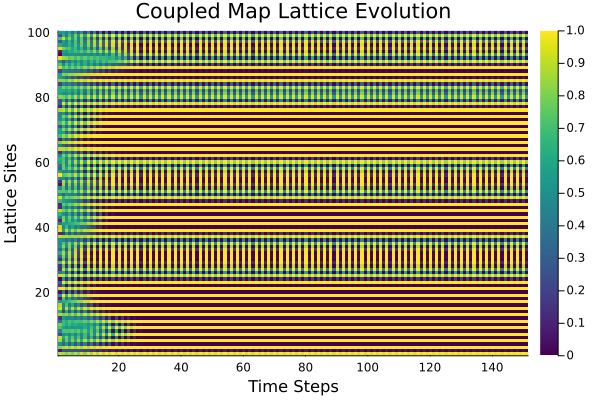

In [21]:
data = hcat(parent_x...)

heatmap(data, xlabel="Time Steps", ylabel="Lattice Sites", color=:viridis, 
        title="Coupled Map Lattice Evolution")